# ArrayGlyph

- This script demonstrates the usage of the ArrayGlyph class from the Cleopatra package.
The ArrayGlyph class provides functionality for visualizing arrays and creating animations.

In [23]:
import os
import numpy as np
from cleopatra.config import Config
Config.set_matplotlib_backend()
from cleopatra.array_glyph import ArrayGlyph
# Set the random seed for reproducibility
np.random.seed(42)

Matplotlib backend set to inline for static plots in Jupyter notebook


## 1. Creating and Visualizing a Simple Array
Let's start by creating a simple 2D array and visualizing it with ArrayGlyph.

In [24]:
# Create a simple 2D array
simple_array = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        simple_array[i, j] = i * j  # Create a multiplication table pattern

In [25]:
# Initialize the ArrayGlyph with the array
array_glyph = ArrayGlyph(simple_array)

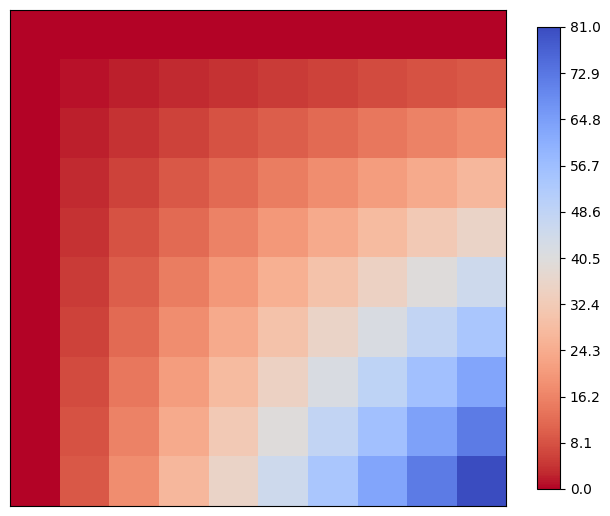

Array shape: (10, 10)
Min value: 0.0
Max value: 81.0


In [26]:
# Plot the array with default settings
fig, ax = array_glyph.plot()

# Display information about the array
print(f"Array shape: {simple_array.shape}")
print(f"Min value: {simple_array.min()}")
print(f"Max value: {simple_array.max()}")

## 2. Customizing the Array Visualization
The ArrayGlyph class provides many options for customizing the visualization.

Create a more complex array

In [27]:
complex_array = np.random.rand(20, 20)  # Random values between 0 and 1
complex_array[5:15, 5:15] = complex_array[5:15, 5:15] * 2  # Increase values in the center

- Initialize the ArrayGlyph with the array

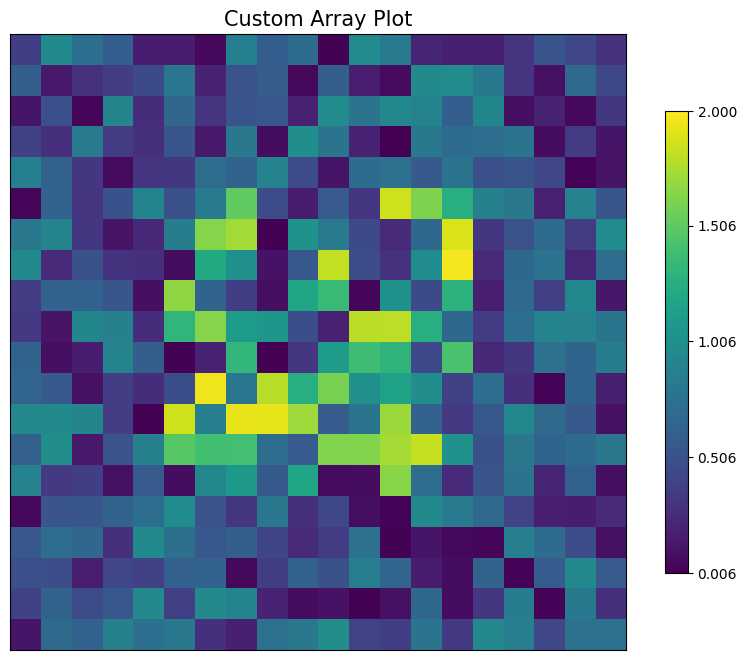

In [28]:
array_glyph_custom = ArrayGlyph(complex_array)

# Plot with custom settings
fig, ax = array_glyph_custom.plot(
    cmap="viridis",           # Use the viridis colormap
    title="Custom Array Plot", # Add a title
    ticks_spacing=0.5,          # Set tick spacing
    figsize=(10, 8)           # Set figure size
)

## 3. Using Different Color Scales
- The ArrayGlyph class supports different color scales for visualizing arrays.

- Create an array with positive and negative values

In [29]:
mixed_array = np.random.randn(15, 15)  # Random values from a normal distribution

- Initialize the ArrayGlyph with the array

In [30]:
array_glyph_scales = ArrayGlyph(mixed_array)

### 3.1 Linear Scale (default)

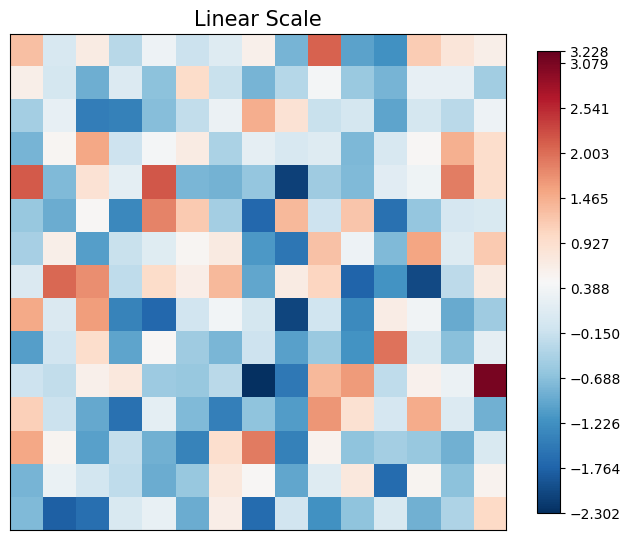

In [31]:
fig1, ax1 = array_glyph_scales.plot(
    color_scale="linear",
    cmap="RdBu_r",
    title="Linear Scale"
)

### 3.2 Power Scale

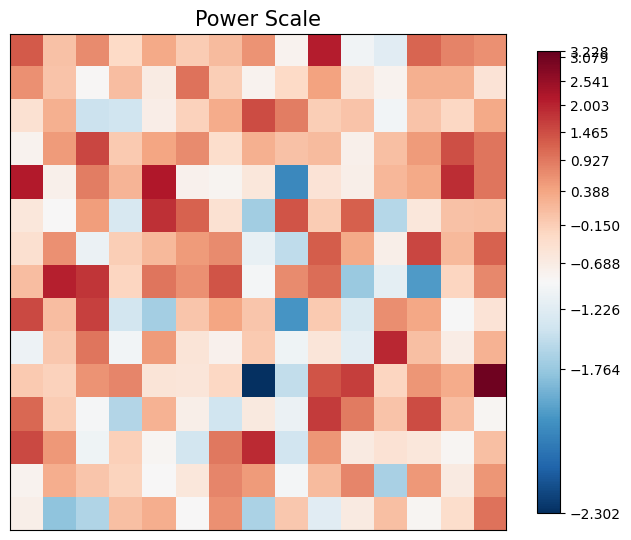

In [32]:
array_glyph_scales = ArrayGlyph(mixed_array)
fig2, ax2 = array_glyph_scales.plot(
    color_scale="power",
    cmap="RdBu_r",
    title="Power Scale"
)

### 3.3 Log Scale

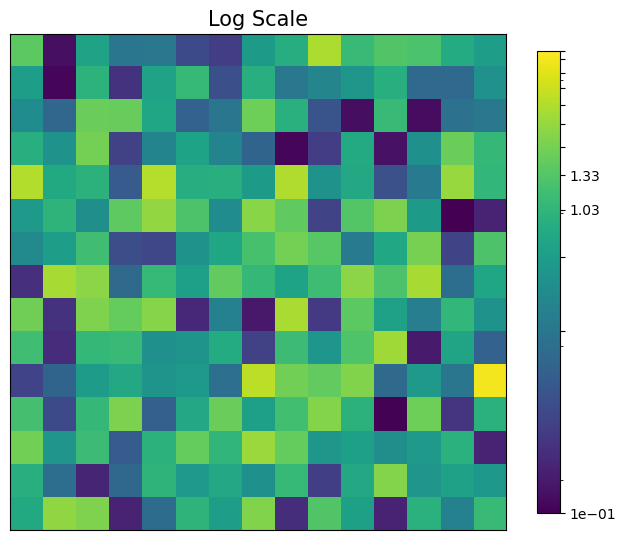

In [33]:
# For log scale, we need positive values
positive_array = np.abs(mixed_array) + 0.1  # Make all values positive and non-zero
array_glyph_positive = ArrayGlyph(positive_array)

fig3, ax3 = array_glyph_positive.plot(
    color_scale="sym-lognorm",
    cmap="viridis",
    title="Log Scale"
)

### 3.4 Midpoint Scale

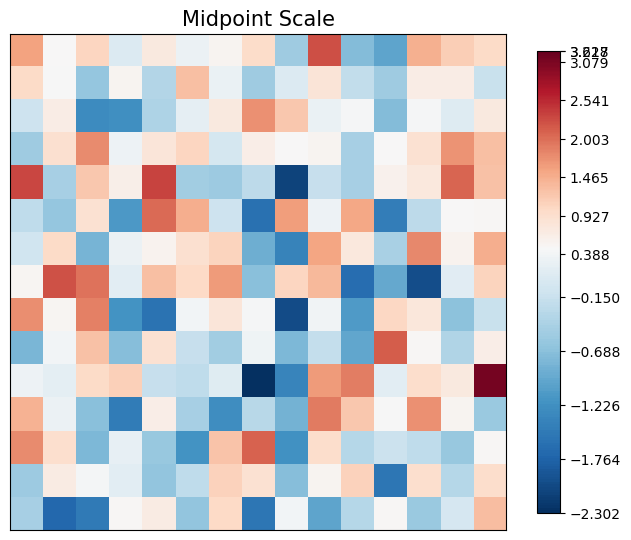

In [34]:
array_glyph_scales = ArrayGlyph(mixed_array)
fig4, ax4 = array_glyph_scales.plot(
    color_scale="midpoint",
    midpoint=0,  # Set the midpoint at 0
    cmap="RdBu_r",
    title="Midpoint Scale"
)

## 4. Displaying Cell Values
- The ArrayGlyph class can display the values of each cell in the array.

- Create a small array for better visibility of cell values

In [35]:
# Create a small array for better visibility of cell values
small_array = np.random.randint(0, 100, (5, 5))

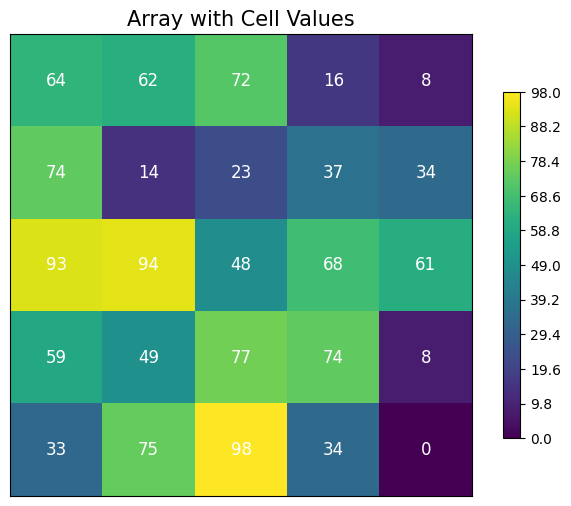

In [36]:
# Initialize the ArrayGlyph with the array
array_glyph_values = ArrayGlyph(small_array)

# Plot with cell values displayed
fig, ax = array_glyph_values.plot(
    display_cell_value=True,   # Display cell values
    num_size=12,               # Set text font size
    cmap="viridis",            # Use the viridis colormap
    title="Array with Cell Values",
    figsize=(8, 6)
)

## 5. Displaying Points on the Array
- The ArrayGlyph class can display points on top of the array.

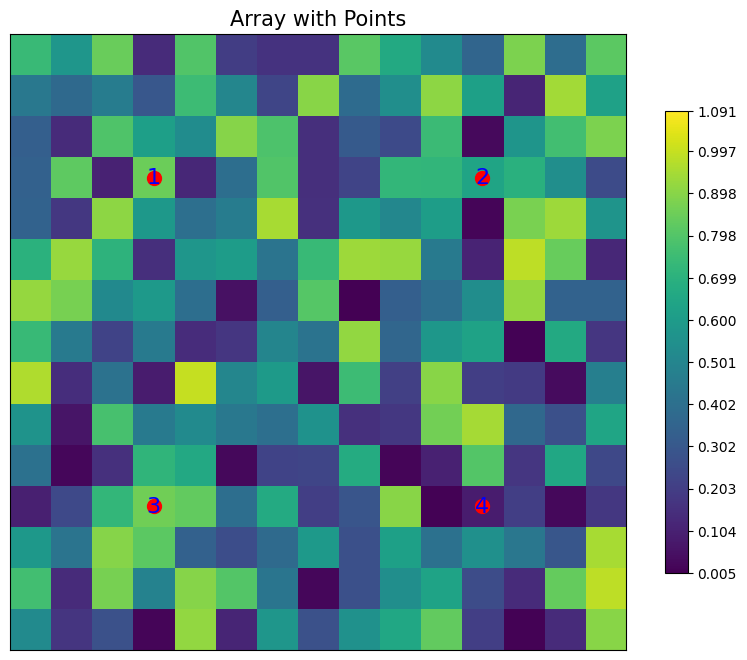

In [37]:
# Create an array
point_array = np.random.rand(15, 15)

# Create some points to display on the array
# Points are specified as [value, row, column] coordinates
points = np.array([
    [1, 3, 3],    # Top-left region
    [2, 3, 11],   # Top-right region
    [3, 11, 3],   # Bottom-left region
    [4, 11, 11]   # Bottom-right region
])

# Initialize the ArrayGlyph with the array
array_glyph_points = ArrayGlyph(point_array)

# Plot with points
fig, ax = array_glyph_points.plot(
    points=points,            # Points to display
    point_color="red",        # Set point color
    point_size=100,           # Set point size
    pid_color="blue",         # Set point ID color
    pid_size=16,              # Set point ID size
    cmap="viridis",           # Use the viridis colormap
    title="Array with Points",
    figsize=(10, 8)
)

## 6. Creating an Animation
- The ArrayGlyph class can create animations of arrays changing over time.

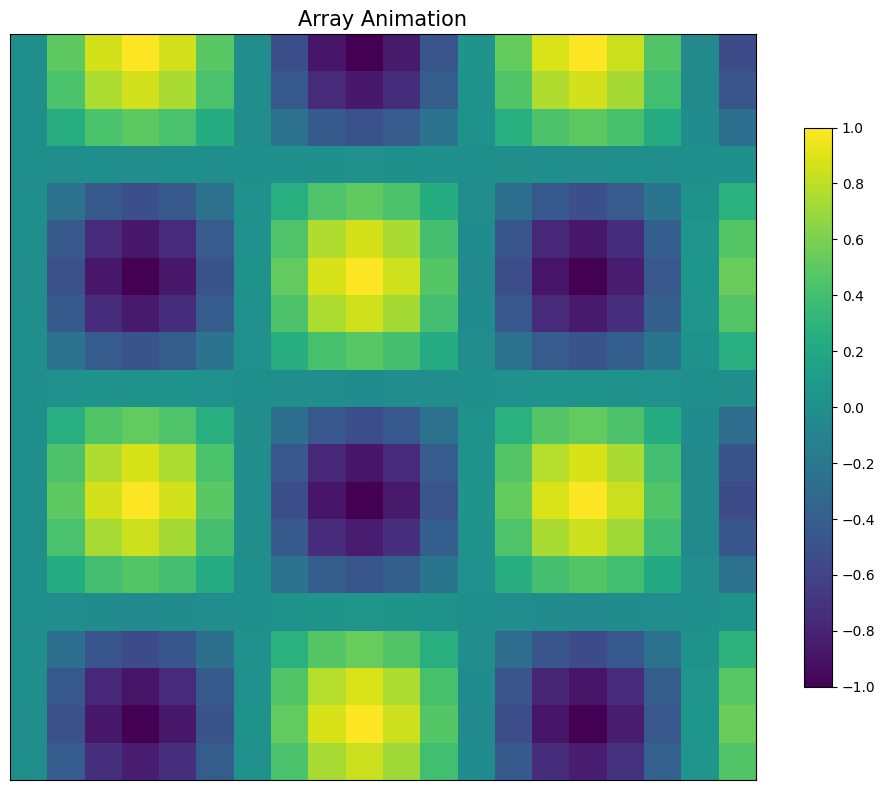

In [38]:
# Create a 3D array for the animation
n_frames = 10
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)

# Create a 3D array with shape (n_frames, 20, 20)
animation_array = np.zeros((n_frames, 20, 20))
for i in range(n_frames):
    # Create a wave pattern that changes with time
    animation_array[i] = np.sin(X + i * 0.5) * np.cos(Y + i * 0.5)

# Initialize the ArrayGlyph with the 3D array
array_glyph_animation = ArrayGlyph(animation_array)

# Create the animation
anim = array_glyph_animation.animate(
    time=list(range(n_frames)),  # Time points
    points=None,                 # No points to display
    interval=200,                # Interval between frames (ms)
    cmap="viridis",              # Use the viridis colormap
    title="Array Animation",
    figsize=(10, 8)
)

- Note: To save the animation, you would use:

In [39]:
array_glyph_animation.save_animation("animation.gif", fps=5)

In [40]:
os.listdir(".")

['.ipynb_checkpoints', 'animation.gif', 'array_glyph_examples.ipynb']

## 7. Preparing Arrays with Different Methods
- The ArrayGlyph class provides methods for preparing arrays for visualization.

### 7.1 Preparing an Array with Cutoff Values

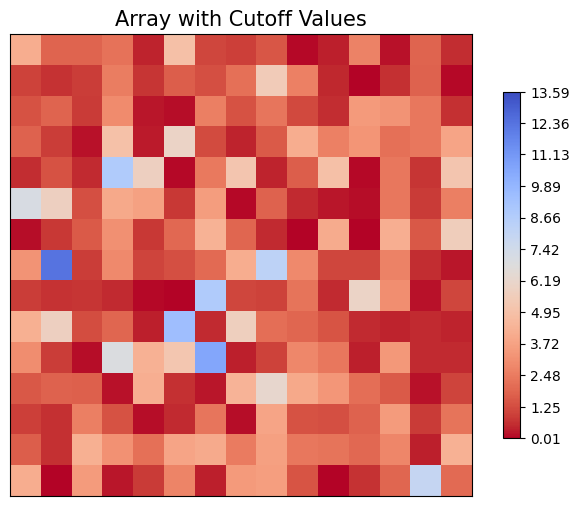

In [41]:
# Create an array with a wide range of values
wide_range_array = np.random.exponential(scale=2.0, size=(15, 15))

# Initialize the ArrayGlyph with cutoff values
array_glyph_cutoff = ArrayGlyph(
    wide_range_array,
    cutoff=[1.0, 5.0]  # Set minimum and maximum values
)

# Plot the array
fig, ax = array_glyph_cutoff.plot(
    title="Array with Cutoff Values",
    figsize=(8, 6)
)

### 7.2 Preparing an Array with Percentile Cutoff

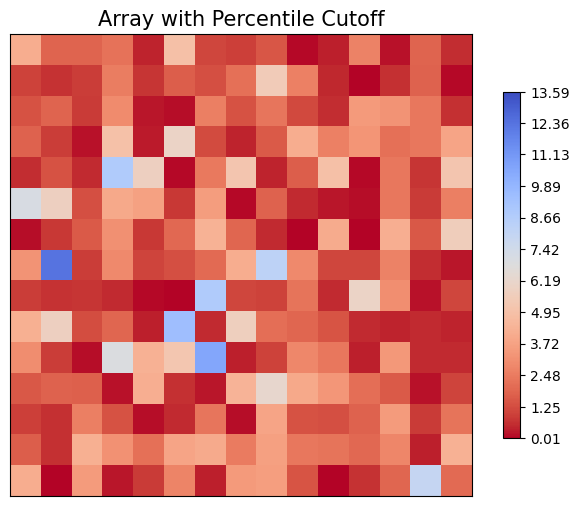

In [42]:
# Initialize the ArrayGlyph with percentile cutoff
array_glyph_percentile = ArrayGlyph(
    wide_range_array,
    percentile=2  # Exclude values below 2nd percentile and above 98th percentile
)

# Plot the array
fig, ax = array_glyph_percentile.plot(
    title="Array with Percentile Cutoff",
    figsize=(8, 6)
)

### 7.3 Preparing an Array with Excluded Values

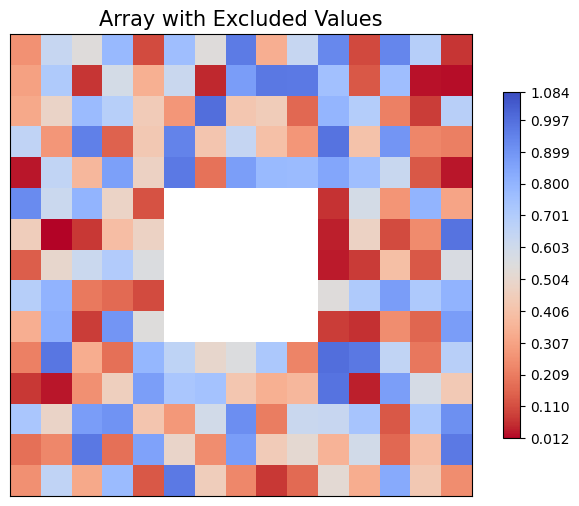

In [43]:
# Create an array with some specific values to exclude
exclude_array = np.random.rand(15, 15)
exclude_array[5:10, 5:10] = -9999  # Set some values to -9999 (to be excluded)

# Initialize the ArrayGlyph with excluded values
array_glyph_exclude = ArrayGlyph(
    exclude_array,
    exclude_value=[-9999]  # Exclude values equal to -9999
)

# Plot the array
fig, ax = array_glyph_exclude.plot(
    title="Array with Excluded Values",
    figsize=(8, 6)
)

## 8. Creating a Custom Colorbar
- The ArrayGlyph class allows customization of the colorbar.

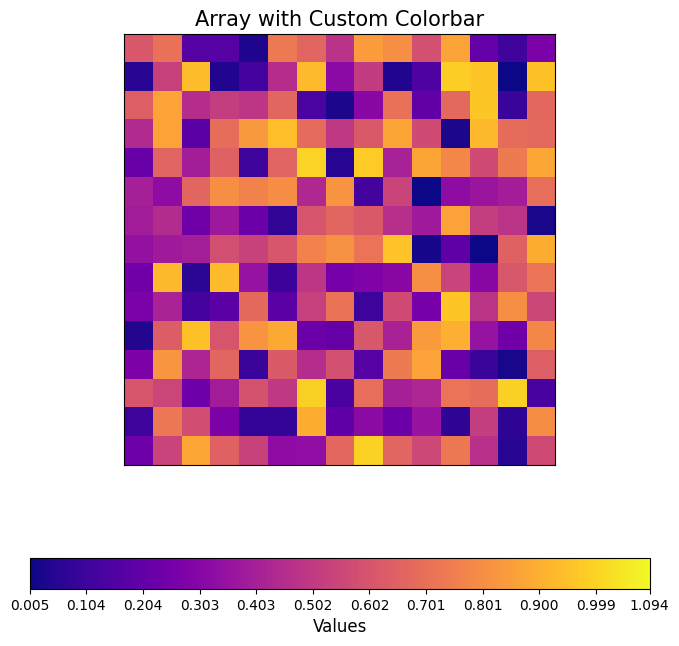

In [44]:
# Create an array
colorbar_array = np.random.rand(15, 15)

# Initialize the ArrayGlyph with the array
array_glyph_colorbar = ArrayGlyph(colorbar_array)

# Plot with a custom colorbar
fig, ax = array_glyph_colorbar.plot(
    cbar_label="Values",              # Set colorbar label
    cbar_orientation="horizontal",    # Set colorbar orientation
    cbar_length=0.8,                  # Shrink the colorbar
    cmap="plasma",                    # Use the plasma colormap
    title="Array with Custom Colorbar",
    figsize=(10, 8)
)

## Summary
In this notebook, we've explored the ArrayGlyph class from the Cleopatra package.

We've seen how to:
1. Create and visualize simple arrays
2. Customize array visualizations
3. Use different color scales
4. Display cell values
5. Display points on arrays
6. Create animations
7. Prepare arrays with different methods
8. Create custom colorbars

The ArrayGlyph class provides powerful tools for visualizing and animating arrays.